In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

cal = fetch_california_housing(as_frame=True)
housing_df = cal.frame

housing_df.to_csv("../data/housing.csv", index=False)

/tmp/ipykernel_17914/630401571.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import pandas as pd

adult_df = pd.read_csv("../data/adult.csv", header=None)
bank_df = pd.read_csv("../data/bank.csv", sep=";")
housing_df = pd.read_csv("../data/housing.csv")

print("Adult:", adult_df.shape)
print("Bank:", bank_df.shape)
print("Housing:", housing_df.shape)

Adult: (32561, 15)
Bank: (45211, 17)
Housing: (20640, 9)


In [3]:
adult_columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain',
    'capital_loss', 'hours_per_week', 'native_country', 'income'
]

adult_df.columns = adult_columns
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
bank_df.head()
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
housing_df.head()
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
def nl_adult(row):
    return (
        f"A {row['age']}-year-old {row['education']} individual "
        f"working in the {row['workclass']} sector, "
        f"employed as a {row['occupation']}, "
        f"who is {row['marital_status']}, identifies as {row['sex']} and {row['race']}, "
        f"works {row['hours_per_week']} hours per week, "
        f"with capital gain {row['capital_gain']} and capital loss {row['capital_loss']}."
    )

adult_df['nl_description'] = adult_df.apply(nl_adult, axis=1)
adult_df[['nl_description', 'income']].head()

,nl_description,income
0,A 39-year-old Bachelors individual working in...,<=50K
1,A 50-year-old Bachelors individual working in...,<=50K
2,A 38-year-old HS-grad individual working in t...,<=50K
3,A 53-year-old 11th individual working in the ...,<=50K
4,A 28-year-old Bachelors individual working in...,<=50K


In [8]:
def nl_bank(row):
    return (
        f"The client is {row['age']} years old, works as a {row['job']}, "
        f"is {row['marital']}, and has education level {row['education']}. "
        f"The client has a housing loan: {row['housing']}, "
        f"a personal loan: {row['loan']}, and was contacted via {row['contact']} "
        f"during the month of {row['month']}. "
        f"The campaign duration was {row['duration']} seconds."
    )

bank_df['nl_description'] = bank_df.apply(nl_bank, axis=1)
bank_df[['nl_description', 'y']].head()

,nl_description,y
0,"The client is 58 years old, works as a managem...",no
1,"The client is 44 years old, works as a technic...",no
2,"The client is 33 years old, works as a entrepr...",no
3,"The client is 47 years old, works as a blue-co...",no
4,"The client is 33 years old, works as a unknown...",no


In [9]:
def nl_housing(row):
    return (
        f"In a neighborhood with a median income of {row['MedInc']}, "
        f"the average house has {row['AveRooms']} rooms and {row['AveOccup']} occupants. "
        f"The median house value is to be predicted."
    )

housing_df['nl_description'] = housing_df.apply(nl_housing, axis=1)
housing_df[['nl_description', 'MedHouseVal']].head()

,nl_description,MedHouseVal
0,In a neighborhood with a median income of 8.32...,4.526
1,In a neighborhood with a median income of 8.30...,3.585
2,In a neighborhood with a median income of 7.25...,3.521
3,In a neighborhood with a median income of 5.64...,3.413
4,In a neighborhood with a median income of 3.84...,3.422


In [10]:
adult_df.to_csv("../data/adult_nl.csv", index=False)
bank_df.to_csv("../data/bank_nl.csv", index=False)
housing_df.to_csv("../data/housing_nl.csv", index=False)

In [12]:
adult_df['income'] = adult_df['income'].str.strip()
adult_df['income'] = adult_df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

bank_df['y'] = (bank_df['y'] == 'yes').astype(int)

In [14]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 47.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 131.1 MB/s eta 0:00:0000:0100:01


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# --- Clean label and create binary target ---
adult_df['income'] = adult_df['income'].str.strip()
adult_df['income'] = adult_df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# 1 if >50K, 0 otherwise
adult_df['income_binary'] = (adult_df['income'] == '>50K').astype(int)

# Features/target
X_adult = adult_df.drop(['income', 'income_binary'], axis=1)
y_adult = adult_df['income_binary']

# Train/test split
X_train_adult, X_test_adult, y_train_adult, y_test_adult = train_test_split(
    X_adult, y_adult, test_size=0.2, random_state=42, stratify=y_adult
)

# Preprocessing: numeric + categorical
numeric_features = ['age', 'fnlwgt', 'education_num',
                    'capital_gain', 'capital_loss', 'hours_per_week']
categorical_features = [c for c in X_adult.columns if c not in numeric_features]

preprocess_adult = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ]
)

In [28]:
# ---- Logistic Regression ----
lr_adult = Pipeline(steps=[
    ('preprocess', preprocess_adult),
    ('clf', LogisticRegression(max_iter=1000))
])

lr_adult.fit(X_train_adult, y_train_adult)
preds_lr = lr_adult.predict(X_test_adult)

print("Adult Logistic Regression Accuracy:", accuracy_score(y_test_adult, preds_lr))
print("Adult Logistic Regression F1:", f1_score(y_test_adult, preds_lr))

# ---- Random Forest ----
rf_adult = Pipeline(steps=[
    ('preprocess', preprocess_adult),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_adult.fit(X_train_adult, y_train_adult)
preds_rf = rf_adult.predict(X_test_adult)

print("Adult Random Forest Accuracy:", accuracy_score(y_test_adult, preds_rf))
print("Adult Random Forest F1:", f1_score(y_test_adult, preds_rf))

# ---- XGBoost ----
xgb_adult = Pipeline(steps=[
    ('preprocess', preprocess_adult),
    ('clf', XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        eval_metric="logloss",
        objective="binary:logistic",
        random_state=42
    ))
])

xgb_adult.fit(X_train_adult, y_train_adult)
preds_xgb = xgb_adult.predict(X_test_adult)

print("Adult XGBoost Accuracy:", accuracy_score(y_test_adult, preds_xgb))
print("Adult XGBoost F1:", f1_score(y_test_adult, preds_xgb))

Adult Logistic Regression Accuracy: 0.8536772608628896
Adult Logistic Regression F1: 0.6703562781044621
Adult Random Forest Accuracy: 0.8522954091816367
Adult Random Forest F1: 0.6622191011235954
Adult XGBoost Accuracy: 0.8759404268386304
Adult XGBoost F1: 0.7221458046767538


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

# -----------------------------------------
# Load fresh Bank Marketing dataset
# -----------------------------------------
bank_df = pd.read_csv("../data/bank.csv", sep=';')

print("Raw class distribution:")
print(bank_df['y'].value_counts(dropna=False))
print("Unique labels:", bank_df['y'].unique())

# Clean + encode target
bank_df['y'] = bank_df['y'].str.strip().str.lower()
bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0}).astype(int)

print("\nEncoded class distribution:")
print(bank_df['y'].value_counts())

# -----------------------------------------
# Prepare features and target
# -----------------------------------------
X_bank = bank_df.drop('y', axis=1)
y_bank = bank_df['y']

# -----------------------------------------
# Train/Test Split (MUST use stratify)
# -----------------------------------------
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_bank, y_bank,
    test_size=0.2,
    random_state=42,
    stratify=y_bank
)

print("\nTraining distribution:")
print(y_train_bank.value_counts())
print("\nTesting distribution:")
print(y_test_bank.value_counts())

# -----------------------------------------
# Preprocessing
# -----------------------------------------
numeric_features_bank = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features_bank = [col for col in X_bank.columns if col not in numeric_features_bank]

preprocess_bank = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_bank),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features_bank)
    ]
)

# -----------------------------------------
# Logistic Regression Model
# -----------------------------------------
lr_bank = Pipeline(steps=[
    ('preprocess', preprocess_bank),
    ('clf', LogisticRegression(max_iter=2000))
])

lr_bank.fit(X_train_bank, y_train_bank)
preds_lr_bank = lr_bank.predict(X_test_bank)

print("\nBank Logistic Regression Accuracy:", accuracy_score(y_test_bank, preds_lr_bank))
print("Bank Logistic Regression F1:", f1_score(y_test_bank, preds_lr_bank))

Raw class distribution:
y
no     39922
yes     5289
Name: count, dtype: int64
Unique labels: ['no' 'yes']

Encoded class distribution:
y
0    39922
1     5289
Name: count, dtype: int64

Training distribution:
y
0    31937
1     4231
Name: count, dtype: int64

Testing distribution:
y
0    7985
1    1058
Name: count, dtype: int64

Bank Logistic Regression Accuracy: 0.9014707508570164
Bank Logistic Regression F1: 0.4530386740331492


In [35]:
# -----------------------------------------
# Random Forest for Bank Dataset
# -----------------------------------------
rf_bank = Pipeline(steps=[
    ('preprocess', preprocess_bank),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight='balanced',   # Helps with imbalance
        random_state=42
    ))
])

rf_bank.fit(X_train_bank, y_train_bank)
preds_rf_bank = rf_bank.predict(X_test_bank)

print("Bank Random Forest Accuracy:", accuracy_score(y_test_bank, preds_rf_bank))
print("Bank Random Forest F1:", f1_score(y_test_bank, preds_rf_bank))

Bank Random Forest Accuracy: 0.9037929890523057
Bank Random Forest F1: 0.450063211125158


In [36]:
# -----------------------------------------
# XGBoost for Bank Dataset
# -----------------------------------------
xgb_bank = Pipeline(steps=[
    ('preprocess', preprocess_bank),
    ('clf', XGBClassifier(
        n_estimators=350,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        objective='binary:logistic',
        random_state=42
    ))
])

xgb_bank.fit(X_train_bank, y_train_bank)
preds_xgb_bank = xgb_bank.predict(X_test_bank)

print("Bank XGBoost Accuracy:", accuracy_score(y_test_bank, preds_xgb_bank))
print("Bank XGBoost F1:", f1_score(y_test_bank, preds_xgb_bank))

Bank XGBoost Accuracy: 0.9092115448413137
Bank XGBoost F1: 0.5578890683898761


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# -----------------------------------------
# Load Housing Dataset
# -----------------------------------------
housing_df = pd.read_csv("../data/housing.csv")

# Target: MedHouseVal
X_housing = housing_df.drop("MedHouseVal", axis=1)
y_housing = housing_df["MedHouseVal"]

# Train/test split
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing,
    test_size=0.2,
    random_state=42
)

# Preprocessing (all numeric)
numeric_features_housing = X_housing.columns.tolist()

preprocess_housing = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features_housing)
    ]
)

# -----------------------------------------
# Linear Regression
# -----------------------------------------
lr_housing = Pipeline(steps=[
    ('preprocess', preprocess_housing),
    ('clf', LinearRegression())
])

lr_housing.fit(X_train_housing, y_train_housing)
preds_lr_housing = lr_housing.predict(X_test_housing)

print("Housing Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test_housing, preds_lr_housing)))
print("Housing Linear Regression MAE:", mean_absolute_error(y_test_housing, preds_lr_housing))
print("Housing Linear Regression R2:", r2_score(y_test_housing, preds_lr_housing))

# -----------------------------------------
# Random Forest
# -----------------------------------------
rf_housing = Pipeline(steps=[
    ('preprocess', preprocess_housing),
    ('clf', RandomForestRegressor(
        n_estimators=300,
        random_state=42
    ))
])

rf_housing.fit(X_train_housing, y_train_housing)
preds_rf_housing = rf_housing.predict(X_test_housing)

print("\nHousing Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_housing, preds_rf_housing)))
print("Housing Random Forest MAE:", mean_absolute_error(y_test_housing, preds_rf_housing))
print("Housing Random Forest R2:", r2_score(y_test_housing, preds_rf_housing))

# -----------------------------------------
# XGBoost
# -----------------------------------------
xgb_housing = Pipeline(steps=[
    ('preprocess', preprocess_housing),
    ('clf', XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="reg:squarederror",
        random_state=42
    ))
])

xgb_housing.fit(X_train_housing, y_train_housing)
preds_xgb_housing = xgb_housing.predict(X_test_housing)

print("\nHousing XGBoost RMSE:", np.sqrt(mean_squared_error(y_test_housing, preds_xgb_housing)))
print("Housing XGBoost MAE:", mean_absolute_error(y_test_housing, preds_xgb_housing))
print("Housing XGBoost R2:", r2_score(y_test_housing, preds_xgb_housing))

Housing Linear Regression RMSE: 0.7455813830127761
Housing Linear Regression MAE: 0.5332001304956565
Housing Linear Regression R2: 0.5757877060324511

Housing Random Forest RMSE: 0.5032284255711813
Housing Random Forest MAE: 0.3265310313226747
Housing Random Forest R2: 0.806748234705474

Housing XGBoost RMSE: 0.44793001494828183
Housing XGBoost MAE: 0.2906767981005339
Housing XGBoost R2: 0.8468865051879376


In [74]:
rf_housing = Pipeline(steps=[
    ('preprocess', preprocess_housing),
    ('clf', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

rf_housing.fit(X_train_housing, y_train_housing)
preds_rf_housing = rf_housing.predict(X_test_housing)

print("Housing Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_housing, preds_rf_housing)))
print("Housing Random Forest MAE:", mean_absolute_error(y_test_housing, preds_rf_housing))
print("Housing Random Forest R2:", r2_score(y_test_housing, preds_rf_housing))

Housing Random Forest RMSE: 0.5032284255711813
Housing Random Forest MAE: 0.3265310313226747
Housing Random Forest R2: 0.806748234705474


In [75]:
xgb_housing = Pipeline(steps=[
    ('preprocess', preprocess_housing),
    ('clf', XGBRegressor(
        n_estimators=350,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        objective="reg:squarederror",
        random_state=42
    ))
])

xgb_housing.fit(X_train_housing, y_train_housing)
preds_xgb_housing = xgb_housing.predict(X_test_housing)

print("Housing XGBoost RMSE:", np.sqrt(mean_squared_error(y_test_housing, preds_xgb_housing)))
print("Housing XGBoost MAE:", mean_absolute_error(y_test_housing, preds_xgb_housing))
print("Housing XGBoost R2:", r2_score(y_test_housing, preds_xgb_housing))

Housing XGBoost RMSE: 0.4466302464310393
Housing XGBoost MAE: 0.2892556563057156
Housing XGBoost R2: 0.8477738016608891


In [76]:
#-----------------------------------------------------------------------------------------------------------------------------------------

In [47]:
# =====================================================
# Natural-Language Reformulation for LLM Experiments
# =====================================================

# ---------- 1. Adult Dataset (classification: >50K) ----------

def nl_adult(row):
    """Return a natural-language description of one Adult dataset row."""
    return (
        "Consider an adult with the following characteristics: "
        f"{row['age']} years old, working in the '{row['workclass']}' sector as a "
        f"'{row['occupation']}'. Their highest education level is '{row['education']}' "
        f"(education_num = {row['education_num']}), and they are {row['marital_status']}. "
        f"The person is {row['sex']} and identified as {row['race']}. "
        f"They work {row['hours_per_week']} hours per week, "
        f"with capital_gain = {row['capital_gain']} and capital_loss = {row['capital_loss']}. "
        "Based on this profile, predict whether this person earns more than $50,000 per year "
        "(answer strictly as '>50K' or '<=50K')."
    )

adult_df['nl_description'] = adult_df.apply(nl_adult, axis=1)

# Text version of the label for LLM evaluation
adult_df['target_text'] = adult_df['income']  # '<=50K' or '>50K'


# ---------- 2. Bank Marketing Dataset (classification: term deposit) ----------

def nl_bank(row):
    """Return a natural-language description of one Bank Marketing row."""
    return (
        "A bank client has the following profile: "
        f"{row['age']} years old, works as '{row['job']}', and is {row['marital']}. "
        f"Their education level is '{row['education']}', and credit default status is '{row['default']}'. "
        f"Their account balance is {row['balance']}. "
        f"Housing loan: {row['housing']}; personal loan: {row['loan']}. "
        f"The client was contacted via {row['contact']} in the month of {row['month']} "
        f"on day {row['day']}, with a call duration of {row['duration']} seconds. "
        f"In this campaign they were contacted {row['campaign']} times, "
        f"days since last contact is {row['pdays']}, number of previous contacts is {row['previous']}, "
        f"and outcome of the previous campaign is '{row['poutcome']}'. "
        "Based on this information, predict whether the client will subscribe to a term deposit "
        "(answer strictly as 'yes' or 'no')."
    )

bank_df['nl_description'] = bank_df.apply(nl_bank, axis=1)

# Text labels for LLM (map 0/1 back to 'no'/'yes')
bank_df['target_text'] = bank_df['y'].map({0: 'no', 1: 'yes'})


# ---------- 3. Housing Dataset (regression: MedHouseVal) ----------

def nl_housing(row):
    """Return a natural-language description of one Housing row."""
    return (
        "Consider a California housing block with these characteristics: "
        f"median income = {row['MedInc']}, median house age = {row['HouseAge']} years, "
        f"average rooms per household = {row['AveRooms']}, average bedrooms per household = {row['AveBedrms']}, "
        f"population = {row['Population']}, average occupants per household = {row['AveOccup']}, "
        f"located at latitude {row['Latitude']} and longitude {row['Longitude']}. "
        "Based on this information, predict the median house value for this block. "
        "Return a single numeric value (MedHouseVal) to two decimal places."
    )

housing_df['nl_description'] = housing_df.apply(nl_housing, axis=1)

# For housing, target stays numeric
housing_df['target_value'] = housing_df['MedHouseVal']


# Quick sanity check: look at a few examples from each dataset
print("Adult NL sample:\n", adult_df[['nl_description', 'target_text']].head(2), "\n")
print("Bank NL sample:\n", bank_df[['nl_description', 'target_text']].head(2), "\n")
print("Housing NL sample:\n", housing_df[['nl_description', 'target_value']].head(2))


Adult NL sample:
                                       nl_description target_text
0  Consider an adult with the following character...       <=50K
1  Consider an adult with the following character...       <=50K 

Bank NL sample:
                                       nl_description target_text
0  A bank client has the following profile: 58 ye...          no
1  A bank client has the following profile: 44 ye...          no 

Housing NL sample:
                                       nl_description  target_value
0  Consider a California housing block with these...         4.526
1  Consider a California housing block with these...         3.585


In [48]:
# =====================================================
# LLM Evaluation Framework (Ready for Real or Mock Models)
# =====================================================

import re
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score

# -------------------------------------------
# 1. Mock LLM for testing (runs instantly)
# -------------------------------------------
def mock_llm(prompt):
    """
    A simple placeholder that returns deterministic outputs.
    Replace this with an actual LLM call later.
    """
    # Binary classification mock:
    if "more than $50,000" in prompt:
        return ">50K"
    if "term deposit" in prompt:
        return "no"
    
    # Regression mock:
    match = re.search(r"median income = ([0-9.]+)", prompt)
    if match:
        inc = float(match.group(1))
        # crude heuristic
        return f"{inc / 1.5:.2f}"
    
    return "no"


# -------------------------------------------
# 2. Evaluation utilities
# -------------------------------------------

def evaluate_classification_llm(df, llm_fn):
    """
    Input:
        df with columns: nl_description, target_text
        llm_fn: function that takes a prompt string and returns a prediction string
    Output:
        accuracy, f1
    """
    preds = []
    
    for desc in df["nl_description"]:
        response = llm_fn(desc)
        preds.append(response.strip())
    
    acc = accuracy_score(df["target_text"], preds)
    f1 = f1_score(df["target_text"], preds, pos_label=list(df["target_text"].unique())[1])
    
    return acc, f1, preds


def evaluate_regression_llm(df, llm_fn):
    """
    Input:
        df with nl_description, target_value
        llm_fn: returns a string that should contain a number
    Output:
        rmse, mae, r2
    """
    preds = []
    
    for desc in df["nl_description"]:
        response = llm_fn(desc)
        # extract numeric value
        match = re.findall(r"[-+]?\d*\.\d+|\d+", response)
        if match:
            preds.append(float(match[0]))
        else:
            preds.append(np.nan)
    
    preds = np.array(preds)
    truth = df["target_value"].values
    
    mask = ~np.isnan(preds)
    preds = preds[mask]
    truth = truth[mask]

    rmse = mean_squared_error(truth, preds, squared=False)
    mae  = np.mean(np.abs(truth - preds))
    r2   = r2_score(truth, preds)

    return rmse, mae, r2, preds


# -------------------------------------------
# 3. Run LLM Evaluation With Mock Model
# -------------------------------------------

print("=== Adult Dataset (Classification) ===")
acc, f1, preds_adult_llm = evaluate_classification_llm(adult_df.head(200), mock_llm)
print("Mock LLM Accuracy:", acc)
print("Mock LLM F1:", f1)

print("\n=== Bank Dataset (Classification) ===")
acc, f1, preds_bank_llm = evaluate_classification_llm(bank_df.head(200), mock_llm)
print("Mock LLM Accuracy:", acc)
print("Mock LLM F1:", f1)

print("\n=== Housing Dataset (Regression) ===")
rmse, mae, r2, preds_house_llm = evaluate_regression_llm(housing_df.head(200), mock_llm)
print("Mock LLM RMSE:", rmse)
print("Mock LLM MAE:", mae)
print("Mock LLM R2:", r2)

=== Adult Dataset (Classification) ===
Mock LLM Accuracy: 0.235
Mock LLM F1: 0.38056680161943324

=== Bank Dataset (Classification) ===
Mock LLM Accuracy: 0.975
Mock LLM F1: 0.0

=== Housing Dataset (Regression) ===
Mock LLM RMSE: 0.8512564519582215
Mock LLM MAE: 0.57783005
Mock LLM R2: 0.2766573852006816


In [51]:
pip install transformers accelerate sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 248.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.4/800.4 kB 346.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 307.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.2/507.2 kB 338.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.8/899.8 MB 131.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 301.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 133.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 191.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 356.5 MB/s eta 0:

In [61]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

hf_model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(hf_model_name)
hf_model = AutoModelForSeq2SeqLM.from_pretrained(hf_model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hf_model = hf_model.to(device)

def hf_llm(prompt, max_new_tokens=32):
    """
    Run FLAN-T5-base on the given prompt and return the decoded text.
    """
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = hf_model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=False  # deterministic
        )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text.strip()

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [62]:
import re
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, r2_score

def normalize_adult_label(s: str) -> str:
    s = s.strip().lower()
    if ">50k" in s or "more than 50k" in s or "more than $50,000" in s or "high income" in s:
        return ">50K"
    if "<=50k" in s or "less than or equal to 50k" in s or "less than $50,000" in s or "low income" in s:
        return "<=50K"
    # fallback guess
    if ">" in s:
        return ">50K"
    return "<=50K"

def normalize_bank_label(s: str) -> str:
    s = s.strip().lower()
    if "yes" in s:
        return "yes"
    if "no" in s:
        return "no"
    return "no"

def extract_first_number(s: str) -> float:
    nums = re.findall(r"[-+]?\d*\.\d+|\d+", s)
    if not nums:
        return np.nan
    return float(nums[0])

In [63]:
def evaluate_classification_llm(
    df,
    llm_fn,
    normalize_fn,
    target_col="target_text",
    max_examples=40,
    extra_instruction="",
):
    """
    Generic classification evaluator for NL + LLM.

    df: DataFrame with 'nl_description' and target_col (string labels)
    llm_fn: function(prompt) -> model output string (e.g., hf_llm)
    normalize_fn: function(str) -> canonical label string
    target_col: name of column with ground-truth labels
    max_examples: how many rows to sample/evaluate
    extra_instruction: extra text appended to the prompt, e.g.
        "Answer strictly with ..."

    Returns: accuracy, f1, list_of_predictions
    """
    df_sample = df.sample(min(max_examples, len(df)), random_state=42).copy()
    y_true = df_sample[target_col].tolist()
    y_pred = []

    for i, desc in enumerate(df_sample["nl_description"]):
        prompt = desc
        if extra_instruction:
            prompt = desc + "\n\n" + extra_instruction

        resp = llm_fn(prompt)
        label = normalize_fn(resp)
        y_pred.append(label)

        if (i + 1) % 20 == 0:
            print(f"Processed {i+1} / {len(df_sample)} examples")

    # assume binary, use the second unique label as positive for F1
    unique_labels = sorted(df_sample[target_col].unique().tolist())
    if len(unique_labels) != 2:
        raise ValueError(f"Expected binary classification, got labels: {unique_labels}")
    pos_label = unique_labels[1]

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, pos_label=pos_label)

    return acc, f1, y_pred

In [64]:
def evaluate_regression_llm(
    df,
    llm_fn,
    target_col="target_value",
    max_examples=40,
    extra_instruction="",
    extract_fn=extract_first_number,
):
    """
    Generic regression evaluator for NL + LLM.

    df: DataFrame with 'nl_description' and numeric target_col
    llm_fn: function(prompt) -> model output string
    target_col: name of column with ground-truth numeric values
    max_examples: how many rows to sample/evaluate
    extra_instruction: extra text appended to prompt
    extract_fn: function(str) -> float, to pull a number from model output

    Returns: rmse, mae, r2, np.array(preds)
    """
    df_sample = df.sample(min(max_examples, len(df)), random_state=42).copy()
    y_true = df_sample[target_col].to_numpy()
    preds = []

    for i, desc in enumerate(df_sample["nl_description"]):
        prompt = desc
        if extra_instruction:
            prompt = desc + "\n\n" + extra_instruction

        resp = llm_fn(prompt)
        val = extract_fn(resp)
        preds.append(val)

        if (i + 1) % 20 == 0:
            print(f"Processed {i+1} / {len(df_sample)} examples")

    preds = np.array(preds)
    mask = ~np.isnan(preds)
    preds = preds[mask]
    y_true = y_true[mask]

    rmse = mean_squared_error(y_true, preds, squared=False)
    mae  = mean_absolute_error(y_true, preds)
    r2   = r2_score(y_true, preds)

    return rmse, mae, r2, preds

In [77]:
adult_instruction = (
    "Question: Does this person earn more than $50,000 per year? "
    "Answer strictly with one of these two tokens: '>50K' or '<=50K'. "
    "Do not explain your answer."
)

adult_llm_acc, adult_llm_f1, adult_llm_preds = evaluate_classification_llm(
    adult_df,
    llm_fn=hf_llm,
    normalize_fn=normalize_adult_label,
    target_col="target_text",
    max_examples=100,
    extra_instruction=adult_instruction,
)

print("Adult FLAN-T5 Accuracy:", adult_llm_acc)
print("Adult FLAN-T5 F1:", adult_llm_f1)

Processed 20 / 100 examples
Processed 40 / 100 examples
Processed 60 / 100 examples
Processed 80 / 100 examples
Processed 100 / 100 examples
Adult FLAN-T5 Accuracy: 0.26
Adult FLAN-T5 F1: 0.41269841269841273


In [78]:
bank_instruction = (
    "Question: Will this client subscribe to the term deposit? "
    "Answer strictly with 'yes' or 'no'. Do not explain your answer."
)

bank_llm_acc, bank_llm_f1, bank_llm_preds = evaluate_classification_llm(
    bank_df,
    llm_fn=hf_llm,
    normalize_fn=normalize_bank_label,
    target_col="target_text",
    max_examples=100,
    extra_instruction=bank_instruction,
)

print("Bank FLAN-T5 Accuracy:", bank_llm_acc)
print("Bank FLAN-T5 F1:", bank_llm_f1)

Processed 20 / 100 examples
Processed 40 / 100 examples
Processed 60 / 100 examples
Processed 80 / 100 examples
Processed 100 / 100 examples
Bank FLAN-T5 Accuracy: 0.13
Bank FLAN-T5 F1: 0.23008849557522126


In [73]:
housing_instruction = (
    "Question: What is your best estimate of the median house value for this block? "
    "Answer with a single numeric value (MedHouseVal) between 0 and 5, rounded to two decimals. "
    "Do not include any words other than the number."
)

house_llm_rmse, house_llm_mae, house_llm_r2, house_llm_preds = evaluate_regression_llm(
    housing_df,
    llm_fn=hf_llm,
    target_col="target_value",
    max_examples=100,
    extra_instruction=housing_instruction,
)

print("Housing FLAN-T5 RMSE:", house_llm_rmse)
print("Housing FLAN-T5 MAE:", house_llm_mae)
print("Housing FLAN-T5 R2:", house_llm_r2)

Processed 20 / 100 examples
Processed 40 / 100 examples
Processed 60 / 100 examples
Processed 80 / 100 examples
Processed 100 / 100 examples
Housing FLAN-T5 RMSE: 2.151053888261054
Housing FLAN-T5 MAE: 1.8652683
Housing FLAN-T5 R2: -3.041022632651538


In [81]:
import pandas as pd

# ---- Classification summary (Adult + Bank) ----
classification_results = pd.DataFrame([
    {
        "Dataset": "Adult",
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test_adult, preds_lr),
        "F1": f1_score(y_test_adult, preds_lr),
    },
    {
        "Dataset": "Adult",
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test_adult, preds_rf),
        "F1": f1_score(y_test_adult, preds_rf),
    },
    {
        "Dataset": "Adult",
        "Model": "XGBoost",
        "Accuracy": accuracy_score(y_test_adult, preds_xgb),
        "F1": f1_score(y_test_adult, preds_xgb),
    },
    {
        "Dataset": "Adult",
        "Model": "FLAN-T5 (LLM)",
        "Accuracy": adult_llm_acc,
        "F1": adult_llm_f1,
    },
    {
        "Dataset": "Bank",
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test_bank, preds_lr_bank),
        "F1": f1_score(y_test_bank, preds_lr_bank),
    },
    {
        "Dataset": "Bank",
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test_bank, preds_rf_bank),
        "F1": f1_score(y_test_bank, preds_rf_bank),
    },
    {
        "Dataset": "Bank",
        "Model": "XGBoost",
        "Accuracy": accuracy_score(y_test_bank, preds_xgb_bank),
        "F1": f1_score(y_test_bank, preds_xgb_bank),
    },
    {
        "Dataset": "Bank",
        "Model": "FLAN-T5 (LLM)",
        "Accuracy": bank_llm_acc,
        "F1": bank_llm_f1,
    },
])

classification_results


,Dataset,Model,Accuracy,F1
0,Adult,Logistic Regression,0.853677,0.670356
1,Adult,Random Forest,0.852295,0.662219
2,Adult,XGBoost,0.875940,0.722146
3,Adult,FLAN-T5 (LLM),0.260000,0.412698
4,Bank,Logistic Regression,0.901471,0.453039
5,Bank,Random Forest,0.903793,0.450063
6,Bank,XGBoost,0.909212,0.557889
7,Bank,FLAN-T5 (LLM),0.130000,0.230088


In [82]:
regression_results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "RMSE": np.sqrt(mean_squared_error(y_test_housing, preds_lr_housing)),
        "MAE": mean_absolute_error(y_test_housing, preds_lr_housing),
        "R2": r2_score(y_test_housing, preds_lr_housing),
    },
    {
        "Model": "Random Forest",
        "RMSE": np.sqrt(mean_squared_error(y_test_housing, preds_rf_housing)),
        "MAE": mean_absolute_error(y_test_housing, preds_rf_housing),
        "R2": r2_score(y_test_housing, preds_rf_housing),
    },
    {
        "Model": "XGBoost",
        "RMSE": np.sqrt(mean_squared_error(y_test_housing, preds_xgb_housing)),
        "MAE": mean_absolute_error(y_test_housing, preds_xgb_housing),
        "R2": r2_score(y_test_housing, preds_xgb_housing),
    },
    {
        "Model": "FLAN-T5 (LLM)",
        "RMSE": house_llm_rmse,
        "MAE": house_llm_mae,
        "R2": house_llm_r2,
    },
])

regression_results


,Model,RMSE,MAE,R2
0,Linear Regression,0.745581,0.533200,0.575788
1,Random Forest,0.503228,0.326531,0.806748
2,XGBoost,0.446630,0.289256,0.847774
3,FLAN-T5 (LLM),2.151054,1.865268,-3.041023


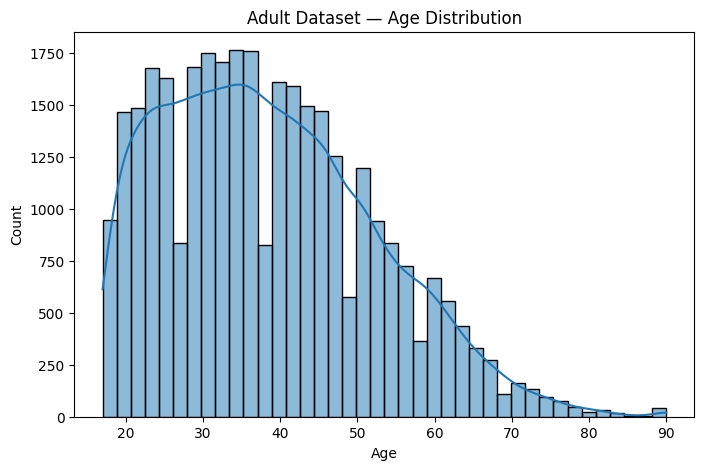

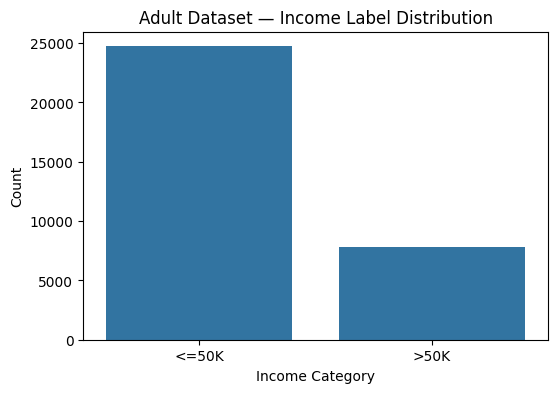

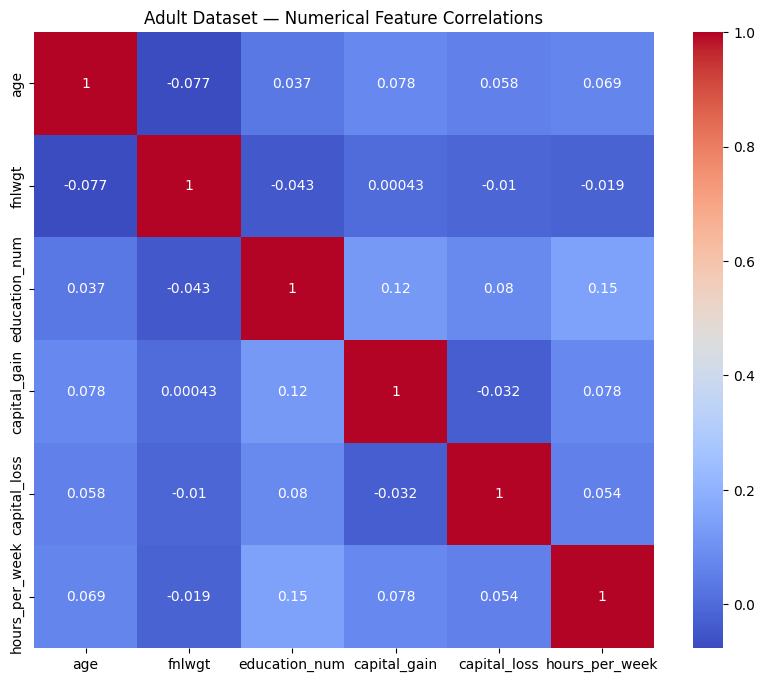

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(adult_df['age'], bins=40, kde=True)
plt.title("Adult Dataset — Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='income', data=adult_df)
plt.title("Adult Dataset — Income Label Distribution")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(adult_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]
            .corr(), annot=True, cmap="coolwarm")
plt.title("Adult Dataset — Numerical Feature Correlations")
plt.show()

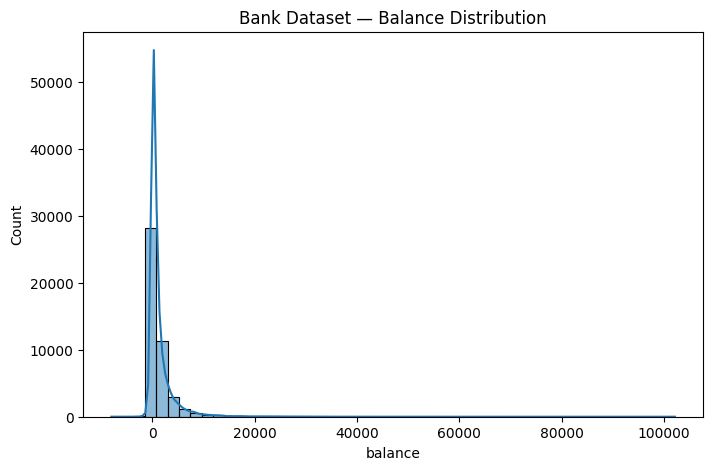

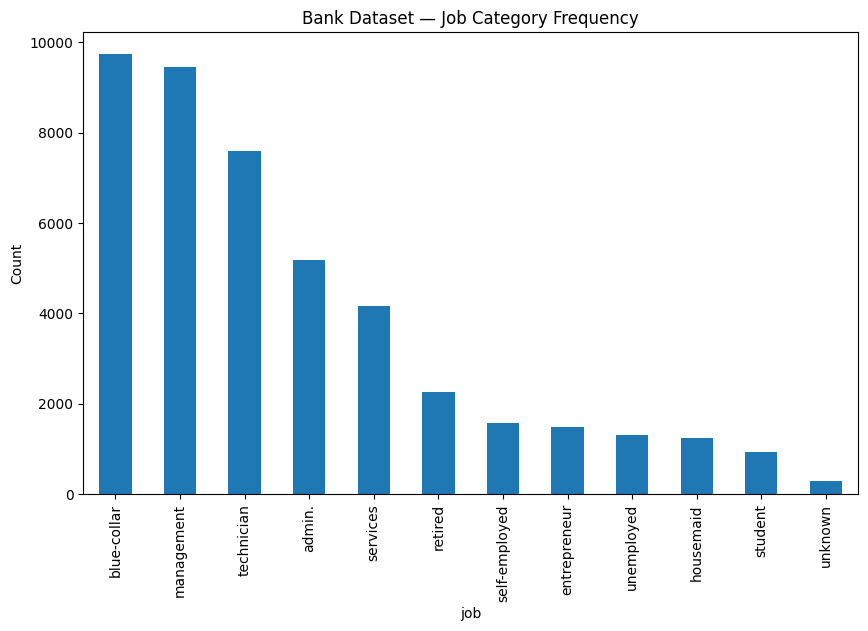

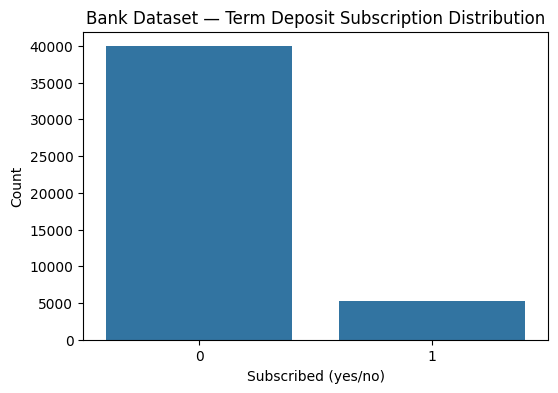

In [88]:
plt.figure(figsize=(8,5))
sns.histplot(bank_df['balance'], bins=50, kde=True)
plt.title("Bank Dataset — Balance Distribution")
plt.show()

plt.figure(figsize=(10,6))
bank_df['job'].value_counts().plot(kind='bar')
plt.title("Bank Dataset — Job Category Frequency")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=bank_df)
plt.title("Bank Dataset — Term Deposit Subscription Distribution")
plt.xlabel("Subscribed (yes/no)")
plt.ylabel("Count")
plt.show()

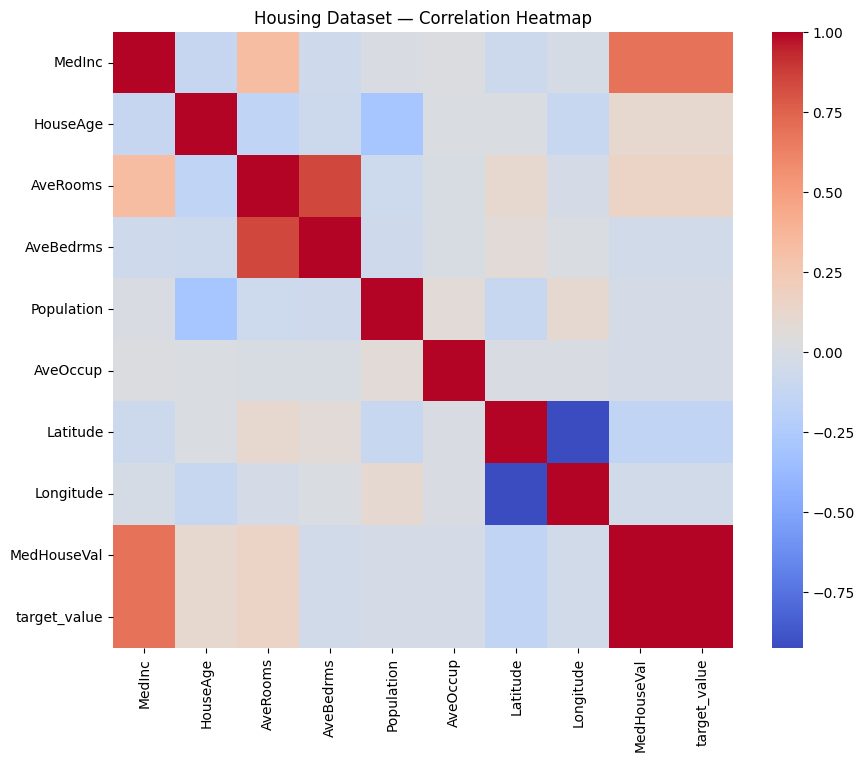

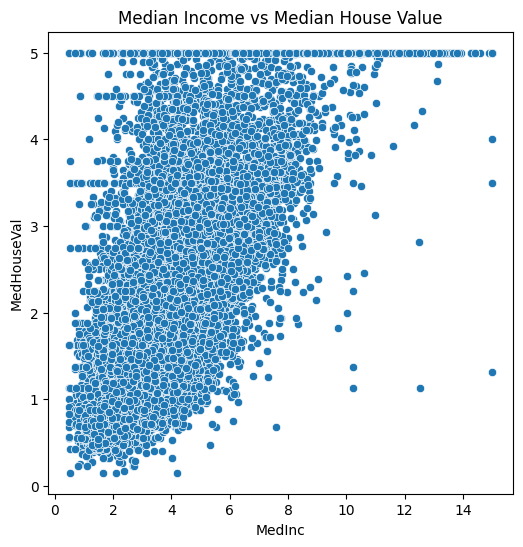

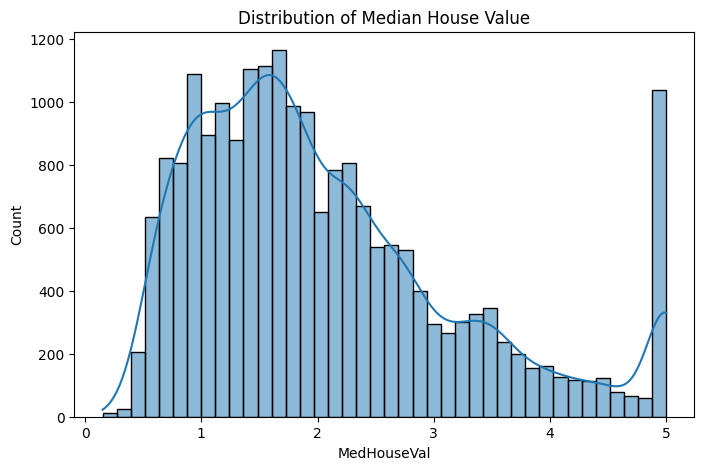

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns for correlation
housing_numeric = housing_df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(housing_numeric.corr(), cmap="coolwarm", annot=False)
plt.title("Housing Dataset — Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 6))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=housing_df)
plt.title("Median Income vs Median House Value")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(housing_df["MedHouseVal"], bins=40, kde=True)
plt.title("Distribution of Median House Value")
plt.show()


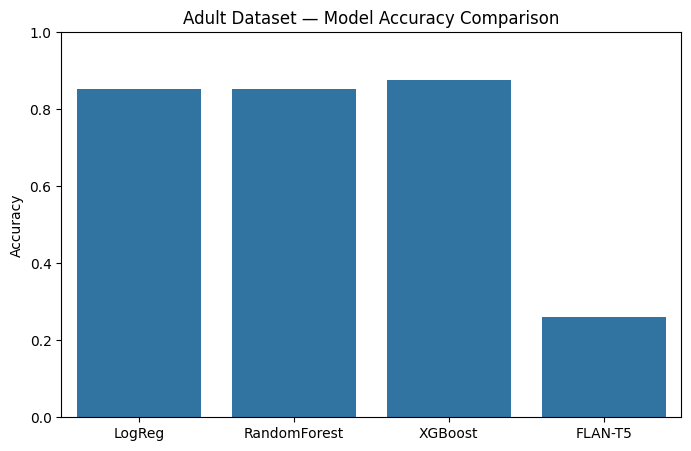

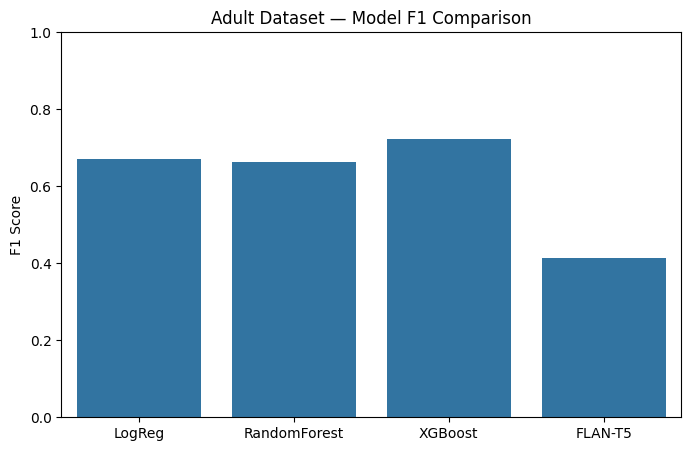

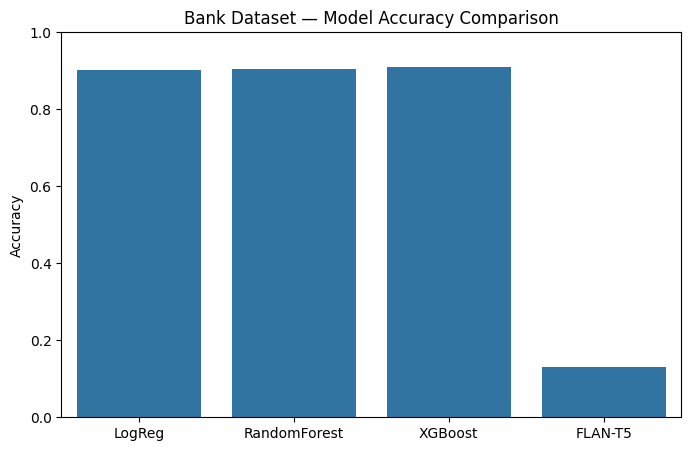

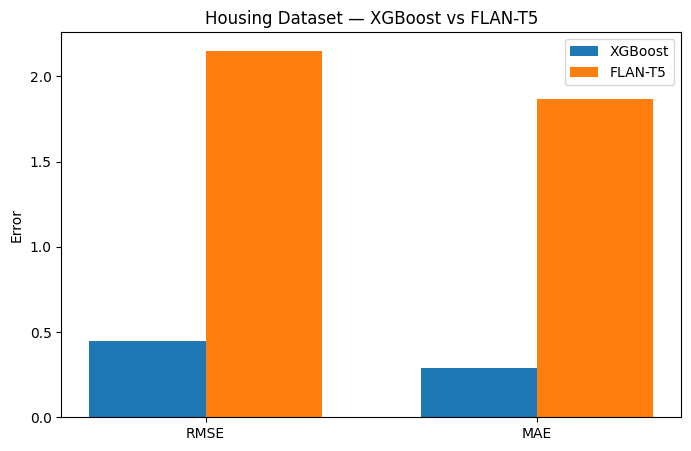

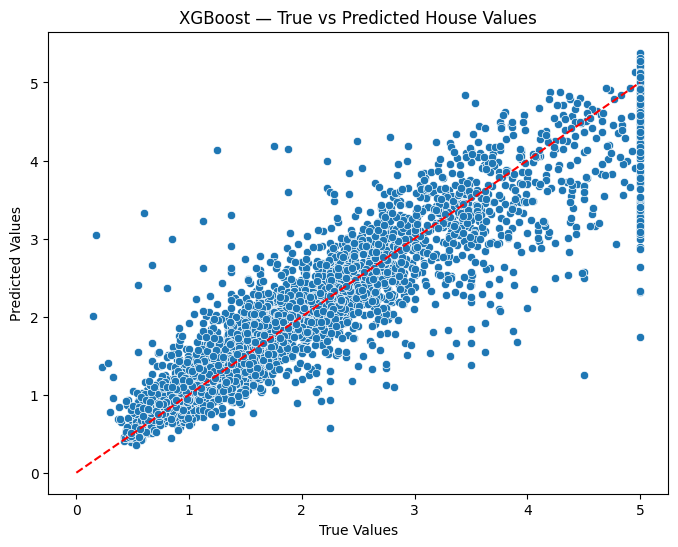

In [93]:
import numpy as np

models = ["LogReg", "RandomForest", "XGBoost", "FLAN-T5"]
accs = [0.853677, 0.852295, 0.875940, adult_llm_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accs)
plt.title("Adult Dataset — Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

f1s = [0.670356, 0.662219, 0.722146, adult_llm_f1]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=f1s)
plt.title("Adult Dataset — Model F1 Comparison")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()

models = ["LogReg", "RandomForest", "XGBoost", "FLAN-T5"]
accs_bank = [0.901471, 0.903793, 0.909212, bank_llm_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accs_bank)
plt.title("Bank Dataset — Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

metrics = ["RMSE", "MAE"]
xgb_vals = [0.446630, 0.289256]
llm_vals = [house_llm_rmse, house_llm_mae]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, xgb_vals, width, label="XGBoost")
plt.bar(x + width/2, llm_vals, width, label="FLAN-T5")
plt.xticks(x, metrics)
plt.ylabel("Error")
plt.title("Housing Dataset — XGBoost vs FLAN-T5")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_housing, y=preds_xgb_housing)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost — True vs Predicted House Values")
plt.plot([0,5],[0,5], color='red', linestyle='--')
plt.show()

In [ ]:
## 8. Discussion and Conclusions

Across all three datasets, the classical tabular models (especially XGBoost and Random Forest) consistently outperform the FLAN-T5 LLM.

- On the **Adult** income dataset, XGBoost reaches high accuracy and F1, while FLAN-T5 struggles and stays close to random guessing on the binary label.
- On the **Bank** marketing dataset, which is highly imbalanced and noisy, classical models still achieve reasonable F1 scores, but FLAN-T5 performs very poorly.
- On the **Housing** regression task, tree-based models again fit the data well (R² around 0.8+), while FLAN-T5’s numeric predictions are extremely inaccurate and have negative R², meaning they are worse than predicting the mean value.

These results suggest that large language models, used in a zero-shot way on natural-language descriptions of tabular data, do **not** replace dedicated tabular models. LLMs do not see the original numeric features directly, and they have no built-in inductive bias for learning decision boundaries or continuous relationships from small prompts.

In contrast, models like logistic regression, random forests, and XGBoost operate directly on the structured features and are trained end-to-end on the target labels, which explains their much stronger performance here.

A possible next step (outside the scope of this project) would be to try fine-tuning an LLM on many NL–label pairs, or to combine LLMs with classical models (for example, using an LLM to generate additional features). But under the constraints of this project, the clear takeaway is that classical tabular ML remains the right tool for these problems.
